<a href="https://colab.research.google.com/github/Maria-Bethania/Data-Analysis-with-Python/blob/main/Analise_de_Dados_Python_Cancelamento_de_cart%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Dados - Cancelamento de Cartões

## Descrição do Desafio

O Diretor de uma grande empresa de Cartão de Crédito percebeu que o número de clientes que cancelam seus cartões tem aumentado significativamente, causando prejuízos para a empresa

    O que fazer para evitar isso?
    Quem maior tendência a cancelar o cartão?

O que temos:

    Base de dados com informações dos clientes, tanto clientes com cartão ativo quanto clientes que cancelaram o cartão

Download da Base de Dados:

https://www.kaggle.com/sakshigoyal7/credit-card-customers

## Extração e Importação

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pandera


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 3.7 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.13.0 requires typing-extensions<4.6.0,>=3.6.6, but you have typing-extensions 4.8.0 which is incompatible.


In [3]:
## Abrindo as bibliotecas
import os                           # Interagir com o sistema operacional.
import pandas as pd
import numpy as np                  # Computação numérica em Python
                                    # Suporte para matrizes multidimensionais, funções matemáticas avançadas e manipulação de dados.
import pandera as pa                # Adiciona recursos de validação de dados.
                                    # Definição de esquemas e regras para verificar a qualidade e integridade dos dados.
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Ignorar avisos
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Extraindo a Base de dados
df = pd.read_csv('/content/drive/MyDrive/Cópia de ClientesBanco.csv', encoding='latin1')
                                                                      # latin1 - codificação de língua latina.

In [6]:
# Criando uma cópia de Segurança
df_backup = df.copy()

## Pré-Análise

In [7]:
# Apresentando os primeiros 05 registros da base de dados.
df.head()

,CLIENTNUM,Categoria,Idade,Sexo,Dependentes,Educação,Estado Civil,Faixa Salarial Anual,Categoria Cartão,Meses como Cliente,...,Inatividade 12m,Contatos 12m,Limite,Limite Consumido,Limite Disponível,Mudanças Transacoes_Q4_Q1,Valor Transacoes 12m,Qtde Transacoes 12m,Mudança Qtde Transações_Q4_Q1,Taxa de Utilização Cartão
0,768805383,Cliente,45,M,3,Ensino Médio,Casado,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1335.0,1144,42,1625.0,0.061
1,818770008,Cliente,49,F,5,Ensino Superior,Solteiro,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1541.0,1291,33,3714.0,0.105
2,713982108,Cliente,51,M,3,Ensino Superior,Casado,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2594.0,1887,20,2333.0,0.000
3,769911858,Cliente,40,F,4,Ensino Médio,Não informado,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1405.0,1171,20,2333.0,0.760
4,709106358,Cliente,40,M,3,Sem ensino formal,Casado,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2175.0,816,28,2.5,0.000


In [8]:
# Verificando o tamanho da base de dados.
linhas, colunas = df.shape
print(f'A base de dados tem {linhas} linhas e {colunas} colunas')


A base de dados tem 10127 linhas e 21 colunas


In [9]:
# Verificando o tipo de dado em cada atributo.
df.dtypes

CLIENTNUM                          int64
Categoria                         object
Idade                              int64
Sexo                              object
Dependentes                        int64
Educação                          object
Estado Civil                      object
Faixa Salarial Anual              object
Categoria Cartão                  object
Meses como Cliente                 int64
Produtos Contratados               int64
Inatividade 12m                    int64
Contatos 12m                       int64
Limite                           float64
Limite Consumido                   int64
Limite Disponível                float64
Mudanças Transacoes_Q4_Q1        float64
Valor Transacoes 12m               int64
Qtde Transacoes 12m                int64
Mudança Qtde Transações_Q4_Q1    float64
Taxa de Utilização Cartão        float64
dtype: object

In [10]:
# Informações detalhadas do DF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CLIENTNUM                      10127 non-null  int64  
 1   Categoria                      10127 non-null  object 
 2   Idade                          10127 non-null  int64  
 3   Sexo                           10127 non-null  object 
 4   Dependentes                    10127 non-null  int64  
 5   Educação                       10127 non-null  object 
 6   Estado Civil                   10127 non-null  object 
 7   Faixa Salarial Anual           10127 non-null  object 
 8   Categoria Cartão               10126 non-null  object 
 9   Meses como Cliente             10127 non-null  int64  
 10  Produtos Contratados           10127 non-null  int64  
 11  Inatividade 12m                10127 non-null  int64  
 12  Contatos 12m                   10127 non-null 

In [11]:
# Checando valores nulos e ausentes
df.isna().sum()

CLIENTNUM                        0
Categoria                        0
Idade                            0
Sexo                             0
Dependentes                      0
Educação                         0
Estado Civil                     0
Faixa Salarial Anual             0
Categoria Cartão                 1
Meses como Cliente               0
Produtos Contratados             0
Inatividade 12m                  0
Contatos 12m                     0
Limite                           0
Limite Consumido                 0
Limite Disponível                0
Mudanças Transacoes_Q4_Q1        0
Valor Transacoes 12m             0
Qtde Transacoes 12m              0
Mudança Qtde Transações_Q4_Q1    0
Taxa de Utilização Cartão        0
dtype: int64

In [12]:
# Calculando em porcentagem valores nulos de cada coluna
porcentagem_nulos = (df.isnull().sum() / len(df)) * 100
display(round(porcentagem_nulos,1))

CLIENTNUM                        0.0
Categoria                        0.0
Idade                            0.0
Sexo                             0.0
Dependentes                      0.0
Educação                         0.0
Estado Civil                     0.0
Faixa Salarial Anual             0.0
Categoria Cartão                 0.0
Meses como Cliente               0.0
Produtos Contratados             0.0
Inatividade 12m                  0.0
Contatos 12m                     0.0
Limite                           0.0
Limite Consumido                 0.0
Limite Disponível                0.0
Mudanças Transacoes_Q4_Q1        0.0
Valor Transacoes 12m             0.0
Qtde Transacoes 12m              0.0
Mudança Qtde Transações_Q4_Q1    0.0
Taxa de Utilização Cartão        0.0
dtype: float64

      Observa-se que há apenas um registro nulo em toda a tabela.

      Este será excluído, visto que trata-se de apenas um registro.

      Esta prática mantém a integridade dos dados e evita interferências nas análises estatísticas.

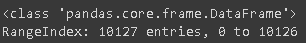

image.png

In [13]:
# Removendo a linha com valor nulo
df = df.dropna()
display(df)

,CLIENTNUM,Categoria,Idade,Sexo,Dependentes,Educação,Estado Civil,Faixa Salarial Anual,Categoria Cartão,Meses como Cliente,...,Inatividade 12m,Contatos 12m,Limite,Limite Consumido,Limite Disponível,Mudanças Transacoes_Q4_Q1,Valor Transacoes 12m,Qtde Transacoes 12m,Mudança Qtde Transações_Q4_Q1,Taxa de Utilização Cartão
0,768805383,Cliente,45,M,3,Ensino Médio,Casado,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1335.000,1144,42,1625.000,0.061
1,818770008,Cliente,49,F,5,Ensino Superior,Solteiro,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1541.000,1291,33,3714.000,0.105
2,713982108,Cliente,51,M,3,Ensino Superior,Casado,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2594.000,1887,20,2333.000,0.000
3,769911858,Cliente,40,F,4,Ensino Médio,Não informado,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1405.000,1171,20,2333.000,0.760
4,709106358,Cliente,40,M,3,Sem ensino formal,Casado,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2175.000,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Cliente,50,M,2,Ensino Superior,Solteiro,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Cancelado,41,M,2,Não informado,Divorciado,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Cancelado,44,F,1,Ensino Médio,Casado,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Cancelado,30,M,2,Ensino Superior,Não informado,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


## Dicionário dos Dados:

- CLIENTNUM: Número Identificador de cada cliente;
- Categoria: Mostra se o cliente estácom cartão ativo ou inativo;
- Idade: Idade do cliente em anos;
- Sexo: Gênero do cliente;
- Dependentes: Quantitativo de dependentes do cliente;
- Educação: Grau de escolaridade do cliente;
- Estado Civil: Estado civil do cliente;
- Faixa Salarial Anual: Renda anual do titular da conta;
- Categoria Cartão: Tipo de cartão que o cliente usa;
- Meses como Cliente: Período de relacionamento com o banco, quantificado em meses;
- Produtos Contratados: Total de produtos contratados pelos clientes;
- Inatividade 12m: Número de meses inativos, nos últimos 12 meses;
- Contatos 12m: Número de contatos nos últimos 12 meses;
- Limite: Limite total do cartão;
- Limite Consumido: Valor consumido do cartão;
- Limite disponível: Média de crédito aberto para compra, nos últimos 12 meses;
- Mudanças Transacoes_Q4_Q1: Alteração no valor da transação, comparando o quarto trimestre em relação ao terceiro. se o cliente gastou mais no primeiro trimestre em comparação com o quarto trimestre;
- Valor Transacoes 12m: Valor total das transações no último ano;
- Qtde Transacoes 12m: Contagem total de transações no último ano;
- Mudança Qtde Transações_Q4_Q1: Mudança na contagem das transações, se o cliente fez mais transações no primeiro trimestre em comparação com o quarto trimestre;
- Taxa de Utilização Cartão: Taxa média de Utilização do Cartão.

### Exclusão de colunas:

- CLIENTNUM;

- Mudanças Transacoes_Q4_Q1;

- Mudança Qtde Transações_Q4_Q1;

- Taxa de Utilização Cartão;

## Transformação

In [14]:
# Retirada de colunas que não serão utilizadas na analise
df.drop(['CLIENTNUM',
         'Mudanças Transacoes_Q4_Q1',
         'Mudança Qtde Transações_Q4_Q1',
         'Taxa de Utilização Cartão'
         ],axis=1,inplace=True)

display(df.head())

,Categoria,Idade,Sexo,Dependentes,Educação,Estado Civil,Faixa Salarial Anual,Categoria Cartão,Meses como Cliente,Produtos Contratados,Inatividade 12m,Contatos 12m,Limite,Limite Consumido,Limite Disponível,Valor Transacoes 12m,Qtde Transacoes 12m
0,Cliente,45,M,3,Ensino Médio,Casado,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1144,42
1,Cliente,49,F,5,Ensino Superior,Solteiro,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1291,33
2,Cliente,51,M,3,Ensino Superior,Casado,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,1887,20
3,Cliente,40,F,4,Ensino Médio,Não informado,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1171,20
4,Cliente,40,M,3,Sem ensino formal,Casado,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,816,28


### Tipagem dos dados

In [15]:
# Casting do atributo 'Limite Consumido'
df['Limite Consumido'] = df['Limite Consumido'].astype(float)


### Visualização de valores únicos

In [16]:
print(sorted(pd.unique(df['Categoria'])))
print(sorted(pd.unique(df['Idade'])))
print(sorted(pd.unique(df['Sexo'])))
print(sorted(pd.unique(df['Dependentes'])))
print(sorted(pd.unique(df['Educação'])))
print(sorted(pd.unique(df['Estado Civil'])))
print(sorted(pd.unique(df['Faixa Salarial Anual'])))
print(sorted(pd.unique(df['Categoria Cartão'])))
print(sorted(pd.unique(df['Meses como Cliente'])))
print(sorted(pd.unique(df['Produtos Contratados'])))
print(sorted(pd.unique(df['Inatividade 12m'])))
print(sorted(pd.unique(df['Contatos 12m'])))
print(sorted(pd.unique(df['Limite'])))
print(sorted(pd.unique(df['Limite Consumido'])))
print(sorted(pd.unique(df['Limite Disponível'])))
print(sorted(pd.unique(df['Valor Transacoes 12m'])))
print(sorted(pd.unique(df['Qtde Transacoes 12m'])))


['Cancelado', 'Cliente']
[26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 70, 73]
['F', 'M']
[0, 1, 2, 3, 4, 5]
['Doutorado', 'Ensino Médio', 'Ensino Superior', 'Ensino Superior Incompleto', 'Não informado', 'Post-Ensino Superior', 'Sem ensino formal']
['Casado', 'Divorciado', 'Não informado', 'Solteiro']
['$120K +', '$40K - $60K', '$60K - $80K', '$80K - $120K', 'Less than $40K', 'Não informado']
['Blue', 'Gold', 'Platinum', 'Silver']
[13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56]
[1, 2, 3, 4, 5, 6]
[0, 1, 2, 3, 4, 5, 6]
[0, 1, 2, 3, 4, 5, 6]
[1438.3, 1439.0, 1440.0, 1441.0, 1442.0, 1443.0, 1446.0, 1449.0, 1451.0, 1452.0, 1454.0, 1456.0, 1457.0, 1458.0, 1459.0, 1460.0, 1461.0, 1462.0, 1466.0, 1467.0, 1468.0, 1469.0, 1470.0, 1471.0, 1472

### Renomeando colunas

In [17]:
df.rename(columns={'Categoria': 'categoria_cliente',
                   'Idade': 'idade',
                   'Sexo': 'genero',
                   'Dependentes': 'dependentes',
                   'Educação': 'escolaridade',
                   'Estado Civil': 'estado_civil',
                   'Faixa Salarial Anual': 'renda_anual',
                   'Categoria Cartão': 'tipo_cartao',
                   'Meses como Cliente': 'relacionamento_meses',
                   'Produtos Contratados': 'produtos_contratados',
                   'Inatividade 12m': 'inatividade_anual',
                   'Contatos 12m': 'contatos_anuais',
                   'Limite': 'limite_cartao',
                   'Limite Consumido': 'limite_consumido',
                   'Limite Disponível': 'limite_disponivel',
                   'Valor Transacoes 12m': 'valor_transacoes_ano',
                   'Qtde Transacoes 12m': 'qtde_transacoes_ano',
                   }, inplace = True)

In [18]:
# Verificando os valores do atributo 'categoria_cliente.'
print(df['categoria_cliente'].unique())

['Cliente' 'Cancelado']


In [19]:
# Substituição de valores da coluna 'categoria_cliente'.
df['categoria_cliente'] = df['categoria_cliente'].replace({'Cliente': 'Cartão ativo', 'Cancelado': 'Cartão cancelado'})

# Verificando se a substituição foi feita corretamente.
print(df['categoria_cliente'].unique())

['Cartão ativo' 'Cartão cancelado']


### Validação dos dados através do PySpark

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10126 entries, 0 to 10126
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   categoria_cliente     10126 non-null  object 
 1   idade                 10126 non-null  int64  
 2   genero                10126 non-null  object 
 3   dependentes           10126 non-null  int64  
 4   escolaridade          10126 non-null  object 
 5   estado_civil          10126 non-null  object 
 6   renda_anual           10126 non-null  object 
 7   tipo_cartao           10126 non-null  object 
 8   relacionamento_meses  10126 non-null  int64  
 9   produtos_contratados  10126 non-null  int64  
 10  inatividade_anual     10126 non-null  int64  
 11  contatos_anuais       10126 non-null  int64  
 12  limite_cartao         10126 non-null  float64
 13  limite_consumido      10126 non-null  float64
 14  limite_disponivel     10126 non-null  float64
 15  valor_transacoes_an

In [21]:
# Definindo o esquema de validação
schema = pa.DataFrameSchema({'categoria_cliente': pa.Column(pa.String),
                            'idade': pa.Column(pa.Int64),
                            'genero': pa.Column(pa.String),
                            'dependentes': pa.Column(pa.Int64),
                            'escolaridade': pa.Column(pa.String),
                            'estado_civil': pa.Column(pa.String),
                            'renda_anual': pa.Column(pa.String),
                            'tipo_cartao': pa.Column(pa.String),
                            'relacionamento_meses': pa.Column(pa.Int),
                            'produtos_contratados': pa.Column(pa.Int),
                            'inatividade_anual': pa.Column(pa.Int),
                            'contatos_anuais': pa.Column(pa.Int),
                            'limite_cartao': pa.Column(pa.Float64),
                            'limite_consumido': pa.Column(pa.Float64),
                            'limite_disponivel': pa.Column(pa.Float64),
                            'valor_transacoes_ano': pa.Column(pa.Int),
                            'qtde_transacoes_ano': pa.Column(pa.Int),
                            })

# Validar o DataFrame
schema.validate(df)

,categoria_cliente,idade,genero,dependentes,escolaridade,estado_civil,renda_anual,tipo_cartao,relacionamento_meses,produtos_contratados,inatividade_anual,contatos_anuais,limite_cartao,limite_consumido,limite_disponivel,valor_transacoes_ano,qtde_transacoes_ano
0,Cartão ativo,45,M,3,Ensino Médio,Casado,$60K - $80K,Blue,39,5,1,3,12691.0,777.0,11914.0,1144,42
1,Cartão ativo,49,F,5,Ensino Superior,Solteiro,Less than $40K,Blue,44,6,1,2,8256.0,864.0,7392.0,1291,33
2,Cartão ativo,51,M,3,Ensino Superior,Casado,$80K - $120K,Blue,36,4,1,0,3418.0,0.0,3418.0,1887,20
3,Cartão ativo,40,F,4,Ensino Médio,Não informado,Less than $40K,Blue,34,3,4,1,3313.0,2517.0,796.0,1171,20
4,Cartão ativo,40,M,3,Sem ensino formal,Casado,$60K - $80K,Blue,21,5,1,0,4716.0,0.0,4716.0,816,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Cartão ativo,50,M,2,Ensino Superior,Solteiro,$40K - $60K,Blue,40,3,2,3,4003.0,1851.0,2152.0,15476,117
10123,Cartão cancelado,41,M,2,Não informado,Divorciado,$40K - $60K,Blue,25,4,2,3,4277.0,2186.0,2091.0,8764,69
10124,Cartão cancelado,44,F,1,Ensino Médio,Casado,Less than $40K,Blue,36,5,3,4,5409.0,0.0,5409.0,10291,60
10125,Cartão cancelado,30,M,2,Ensino Superior,Não informado,$40K - $60K,Blue,36,4,3,3,5281.0,0.0,5281.0,8395,62


## Análise

### Análise descritiva prévia (Resumo estatístico)

In [22]:
#Resumo estatístico, com valores arredondados para uma casa decimal.

medidas = df.describe().round(1)
display(medidas)

,idade,dependentes,relacionamento_meses,produtos_contratados,inatividade_anual,contatos_anuais,limite_cartao,limite_consumido,limite_disponivel,valor_transacoes_ano,qtde_transacoes_ano
count,10126.0,10126.0,10126.0,10126.0,10126.0,10126.0,10126.0,10126.0,10126.0,10126.0,10126.0
mean,46.3,2.3,35.9,3.8,2.3,2.5,8632.0,1162.8,7469.2,4404.4,64.9
std,8.0,1.3,8.0,1.6,1.0,1.1,9089.2,815.0,9091.1,3397.2,23.5
min,26.0,0.0,13.0,1.0,0.0,0.0,1438.3,0.0,3.0,510.0,10.0
25%,41.0,1.0,31.0,3.0,2.0,2.0,2555.0,358.0,1324.2,2156.0,45.0
50%,46.0,2.0,36.0,4.0,2.0,2.0,4549.0,1276.0,3473.0,3899.5,67.0
75%,52.0,3.0,40.0,5.0,3.0,3.0,11067.8,1784.0,9860.0,4741.0,81.0
max,73.0,5.0,56.0,6.0,6.0,6.0,34516.0,2517.0,34516.0,18484.0,139.0


### Quantitativo de clientes com cartão ativo e cancelado

In [23]:
clientes_categoria = df['categoria_cliente'].value_counts()
display(clientes_categoria)

clientes_categoria_perc = round((df['categoria_cliente'].value_counts(normalize=True)) * 100, 2)
display(clientes_categoria_perc)

Cartão ativo        8499
Cartão cancelado    1627
Name: categoria_cliente, dtype: int64

Cartão ativo        83.93
Cartão cancelado    16.07
Name: categoria_cliente, dtype: float64

- Apresenta-se uma taxa de pouco mais de 16% de cancelamento de cartões;

- Taxa relativamente alta, indicando cancelamento de 1 a cada 6 clientes;

      - Indicativo que algo está impactando negativamente a percepção dos clientes em relação aos serviços prestados;

### Analisando os clientes que cancelaram o cartão

In [24]:
# Criando uma base de dados somente com clientes que cancelaram o cartão
df_cancelado = pd.DataFrame(df[df['categoria_cliente'] == 'Cartão cancelado'].copy())
display(df_cancelado.head())

,categoria_cliente,idade,genero,dependentes,escolaridade,estado_civil,renda_anual,tipo_cartao,relacionamento_meses,produtos_contratados,inatividade_anual,contatos_anuais,limite_cartao,limite_consumido,limite_disponivel,valor_transacoes_ano,qtde_transacoes_ano
21,Cartão cancelado,62,F,0,Ensino Superior,Casado,Less than $40K,Blue,49,2,3,3,1438.3,0.0,1438.3,692,16
39,Cartão cancelado,66,F,0,Doutorado,Casado,Não informado,Blue,56,5,4,3,7882.0,605.0,7277.0,704,16
51,Cartão cancelado,54,F,1,Ensino Superior,Casado,Less than $40K,Blue,40,2,3,1,1438.3,808.0,630.3,705,19
54,Cartão cancelado,56,M,2,Ensino Superior,Casado,$120K +,Blue,36,1,3,3,15769.0,0.0,15769.0,602,15
61,Cartão cancelado,48,M,2,Ensino Superior,Casado,$60K - $80K,Silver,35,2,4,4,34516.0,0.0,34516.0,691,15


In [25]:
df_cancelado.dtypes

categoria_cliente        object
idade                     int64
genero                   object
dependentes               int64
escolaridade             object
estado_civil             object
renda_anual              object
tipo_cartao              object
relacionamento_meses      int64
produtos_contratados      int64
inatividade_anual         int64
contatos_anuais           int64
limite_cartao           float64
limite_consumido        float64
limite_disponivel       float64
valor_transacoes_ano      int64
qtde_transacoes_ano       int64
dtype: object

#### Idade

In [26]:
# Comparando idade entre clientes com cartão ativo e cartão cancelado.
import plotly.express as px
idade = px.histogram(df, x = 'idade', color = 'categoria_cliente' )
idade.show()


      - Não há diferença significativa nas idades entre os grupos.

      - Inicialmente, avalia-se que idade não é fator determinante no cancelamento dos cartões.


- Distribuição simétrica na faixa etária entre 40 e 55 anos para os clientes que cancelaram os cartões;

    - Observar perfil demográfico - situação financeira, preferência por produtos, etc;
    - Estratégias de retenção - benefícios ou serviços adicionais;

#### Gênero

In [27]:
# Distribuição de clientes que cancelaram o cartão, por gênero.

genero_cancelados = df_cancelado['genero']
genero_cancelados.value_counts(normalize=True)

F    0.571604
M    0.428396
Name: genero, dtype: float64

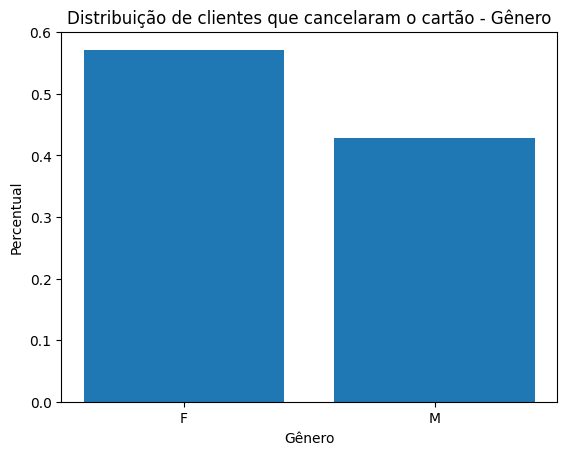

In [28]:
distribuicao_genero_cancelados = genero_cancelados.value_counts(normalize=True)
plt.bar(distribuicao_genero_cancelados.index, distribuicao_genero_cancelados.values)
plt.xlabel('Gênero')
plt.ylabel('Percentual')
plt.title('Distribuição de clientes que cancelaram o cartão - Gênero')
plt.show()

- Na amostra, dentre os clientes que cancelaram o cartão, 57% são do gênero Feminino;



#### Dependentes

In [29]:
# Proporção de dependentes por categoria de clientes.

prop_dependentes = df.groupby('categoria_cliente')['dependentes'].mean().round(1)
print(prop_dependentes)

categoria_cliente
Cartão ativo        2.3
Cartão cancelado    2.4
Name: dependentes, dtype: float64


    Dentre os clientes que cancelaram o cartão, a média de dependentes é de 2.4;

In [30]:
# Distribuição de clientes que cancelaram o cartão, por quantidade de dependentes.

dependentes_cancelados = df_cancelado['dependentes'].value_counts()
dependentes_cancelados = dependentes_cancelados.sort_index()
display(dependentes_cancelados)

0    135
1    269
2    417
3    482
4    260
5     64
Name: dependentes, dtype: int64

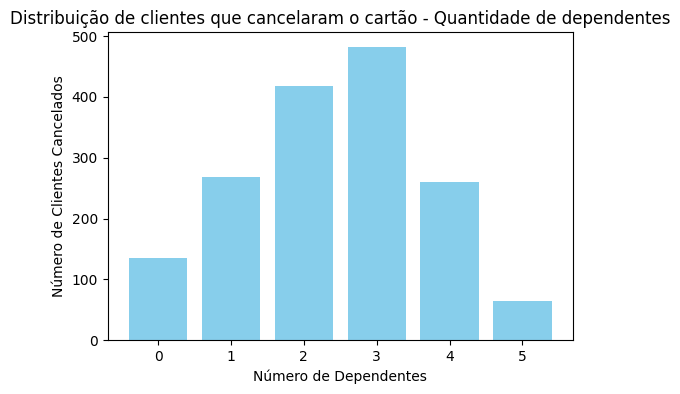

In [31]:
# Gráfico de distribuição de clientes que cancelaram o cartão, por quantidade de dependentes.

plt.figure(figsize=(6, 4))
plt.bar(dependentes_cancelados.index, dependentes_cancelados.values, color='skyblue')
plt.xlabel('Número de Dependentes')
plt.ylabel('Número de Clientes Cancelados')
plt.title('Distribuição de clientes que cancelaram o cartão - Quantidade de dependentes')
plt.show()

- A maioria dos clientes que cancelou o cartão tem 2 ou 3 dependentes;


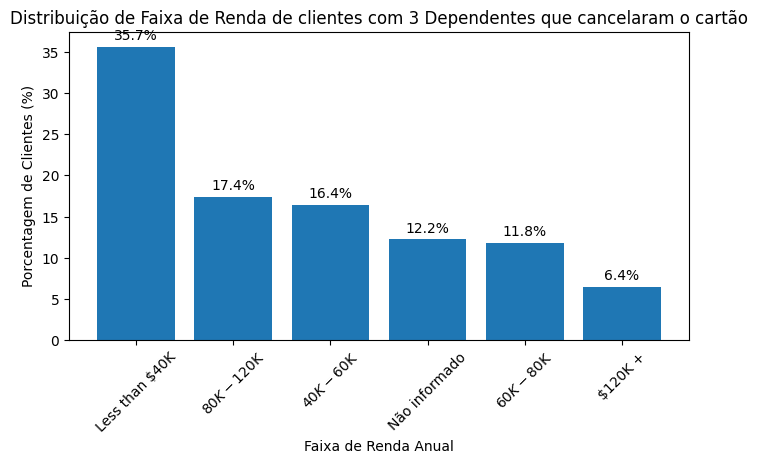

In [32]:
# Faixa de renda dos clientes com 3 dependentes que cancelaram o cartão.
# Frequência das faixas de renda
# Frequência em porcentagem
clientes_3_dependentes = df_cancelado[df_cancelado['dependentes'] == 3]
frequencia_renda = clientes_3_dependentes['renda_anual'].value_counts()
frequencia_renda_percentual = (frequencia_renda / frequencia_renda.sum()) * 100

# Gráfico com faixa de rnda de clientes, com 3 dependentes, que cancelaram o cartão.
plt.figure(figsize=(8,4))
plt.bar(frequencia_renda_percentual.index, frequencia_renda_percentual.values)
plt.xlabel('Faixa de Renda Anual')
plt.ylabel('Porcentagem de Clientes (%)')
plt.title('Distribuição de Faixa de Renda de clientes com 3 Dependentes que cancelaram o cartão')
plt.xticks(rotation=45)

for i, v in enumerate(frequencia_renda_percentual.values):
    plt.text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom', fontsize=10)

plt.show()


- Dos clientes que cancelaram o cartão, e tem 3 dependentes, 35% tem renda anual menor que 40 mil.

      - Custo de vida maior que a renda;

      - Estratégias para atender as necessidades financeiras desse grupo específico;


In [33]:
# Analisando quantitativo de dependentes das pessoas do gênero feminino que cancelaram o cartão.

df_genero_feminino = df_cancelado[df_cancelado['genero'] == 'F']
contagem_dependentes = df_genero_feminino['dependentes'].value_counts().sort_index()
contagem_dependentes = contagem_dependentes.reindex(range(7), fill_value=0)

frequencia_dependentes = contagem_dependentes / len(df_genero_feminino) * 100

for num_dependentes, (contagem, frequencia) in enumerate(zip(contagem_dependentes, frequencia_dependentes)):
    print(f'Número de dependentes: {num_dependentes}, Contagem: {contagem}, Frequência: {frequencia:.2f}%')



Número de dependentes: 0, Contagem: 77, Frequência: 8.28%
Número de dependentes: 1, Contagem: 169, Frequência: 18.17%
Número de dependentes: 2, Contagem: 228, Frequência: 24.52%
Número de dependentes: 3, Contagem: 272, Frequência: 29.25%
Número de dependentes: 4, Contagem: 154, Frequência: 16.56%
Número de dependentes: 5, Contagem: 30, Frequência: 3.23%
Número de dependentes: 6, Contagem: 0, Frequência: 0.00%


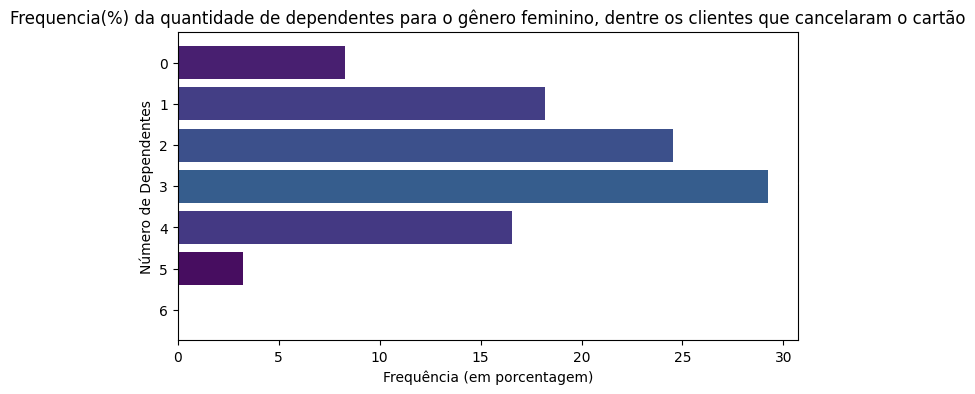

In [34]:
# Calculando a frequencia da quantidade de dependentes do gênero feminino, dentre os que cancelaram o cartão.

num_dependentes = contagem_dependentes.index
frequencia_porcentagem = frequencia_dependentes.values

fig, ax = plt.subplots(figsize=(8, 4))
colors = plt.cm.viridis(frequencia_porcentagem / 100)  # Viridis é uma paleta de cores
bars = plt.barh(num_dependentes, frequencia_porcentagem, color=colors)

for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.1f}%', va='center', ha='left', color='white', fontsize=10)

plt.xlabel('Frequência (em porcentagem)')
plt.ylabel('Número de Dependentes')
plt.title('Frequencia(%) da quantidade de dependentes para o gênero feminino, dentre os clientes que cancelaram o cartão')
plt.gca().invert_yaxis()
plt.show()



Do total de mulheres que cancelaram o cartão, mais de 50% destas tem de 2 a 3 dependentes.

`O FATO ACIMA, POR SI SÓ, NÃO JUSTIFICA O CANCELAMENTO DO CARTÃO.`

      Aqui pode-se tratar de mudanças nas circunstâncias financeiras, preferência poor outros métodos de pagamento, etc.

Todavia, para esse grupo específico, a empresa pode trazer algumas intervenções:

      - Programas de benefícios para familiares;
      - Flexibilidade nas condições de crédito;
      - programas de fidelidade específicos;

      DEMONSTRAÇÃO DE COMPROMISSO GENUÍNO PARA ATENDER AS NECESSIDADES DO CLIENTE.



#### Escolaridade

In [35]:
# Analisando grau de escolaridade entre os clientes que cancelaram o cartão.

escolaridade_cancelados = df_cancelado['escolaridade']
escolaridade_cancelados.value_counts(normalize=True)

Ensino Superior               0.299324
Ensino Médio                  0.188076
Não informado                 0.157345
Sem ensino formal             0.145667
Ensino Superior Incompleto    0.094653
Doutorado                     0.058390
Post-Ensino Superior          0.056546
Name: escolaridade, dtype: float64

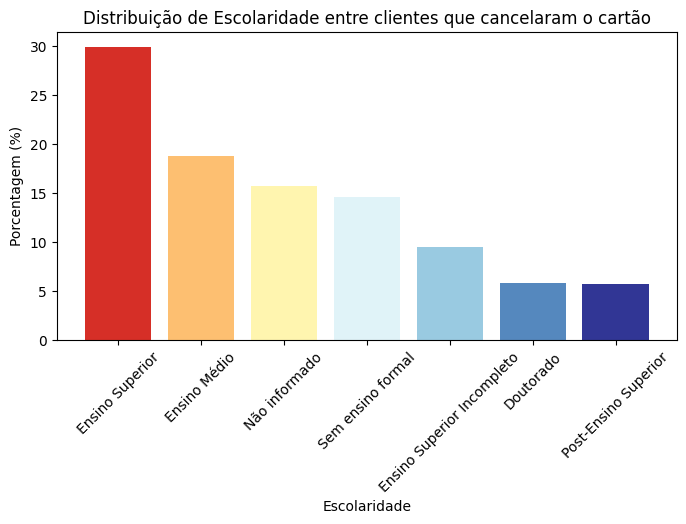

In [36]:
# Distruibuição gráfica dos clientes que cancelaram o cartão, por grau de escolaridade.

frequencia_relativa = escolaridade_cancelados.value_counts(normalize=True)
categoria_max = frequencia_relativa.idxmax()

cores = np.linspace(0.2, 1, len(frequencia_relativa))
cores[frequencia_relativa.index == categoria_max] = 0.1

plt.figure(figsize=(8, 4))
plt.bar(frequencia_relativa.index, frequencia_relativa.values * 100, color=plt.cm.RdYlBu(cores))
plt.xlabel('Escolaridade')
plt.ylabel('Porcentagem (%)')
plt.title('Distribuição de Escolaridade entre clientes que cancelaram o cartão')
plt.xticks(rotation=45)
plt.show()


- Aproximadamente 30% dos clientes que cancelaram o cartão, possuem Graduação completa.

      - Análise de necessidades: Pesquisas ou feedbacks diretos de clientes;
      - Personalizar o atendimento: Soluções customizadas;
      - Programas de fidelidade: bBenefícios adicionais;

#### Estado civil

In [37]:
estado_civil_cancelados = df_cancelado['estado_civil']
estado_civil_cancelados.value_counts(normalize=True)

Casado           0.435771
Solteiro         0.410572
Não informado    0.079287
Divorciado       0.074370
Name: estado_civil, dtype: float64

- A porcentagem de clientes casados e solteiros que cancelaram o cartão é relativamente semelhante, o que sugere que o estado civil não é um fator importante para explicar o cancelamento do cartão.

#### Renda anual


In [38]:
renda_cancelados = df_cancelado['renda_anual']
freq_relativa_renda = renda_cancelados.value_counts(normalize=True)
print(freq_relativa_renda)

Less than $40K    0.376152
$40K - $60K       0.166564
$80K - $120K      0.148740
$60K - $80K       0.116165
Não informado     0.114935
$120K +           0.077443
Name: renda_anual, dtype: float64


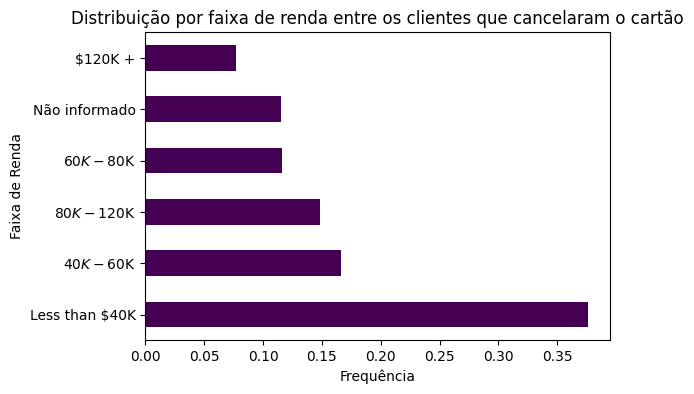

In [39]:
plt.figure(figsize=(6, 4))
freq_relativa_renda.plot(kind='barh', stacked=True, colormap='viridis')
plt.xlabel('Frequência')
plt.ylabel('Faixa de Renda')
plt.title('Distribuição por faixa de renda entre os clientes que cancelaram o cartão')
plt.show()

37% dos clientes que cancelaram o cartão estão na menor faixa de renda anual.



#### Tipo de cartão

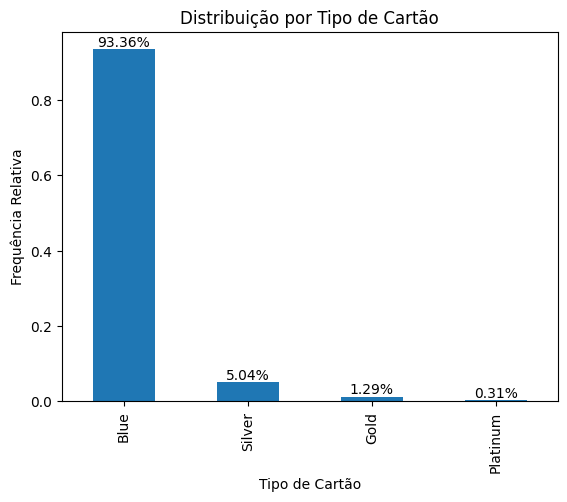

In [40]:
tipo_cartao_cancelados = df_cancelado['tipo_cartao']
frequencia_relativa = tipo_cartao_cancelados.value_counts(normalize=True)

ax = frequencia_relativa.plot(kind='bar')
for p in ax.patches:
    ax.annotate(f'{p.get_height()*100:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.xlabel('Tipo de Cartão')
plt.ylabel('Frequência Relativa')
plt.title('Distribuição por Tipo de Cartão')
plt.show()



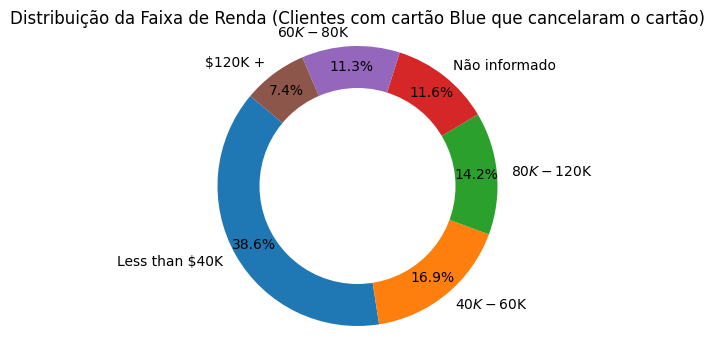

In [41]:
# Analisando os clientes que cancelaram e usavam o cartão "Blue"
clientes_blue_cancelados = df_cancelado[df_cancelado['tipo_cartao'] == 'Blue']

# Faixa de renda para esses clientes
frequencia_renda_blue = clientes_blue_cancelados['renda_anual'].value_counts(normalize=True)

plt.figure(figsize=(6, 4))
plt.pie(frequencia_renda_blue, labels=frequencia_renda_blue.index, autopct='%1.1f%%', startangle=140, pctdistance=0.85)
plt.axis('equal')
centro_circulo = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centro_circulo)
plt.title('Distribuição da Faixa de Renda (Clientes com cartão Blue que cancelaram o cartão)')
plt.show()


- Mais de 93% dos clientes que cancelaram o cartão, usavam o cartão do tipo blue!

- Dos clientes que cancelaram e usavam cartão Blue, 39% tem renda anual menor que 40 mil.



#### Período de relacionamento do cliente com o banco

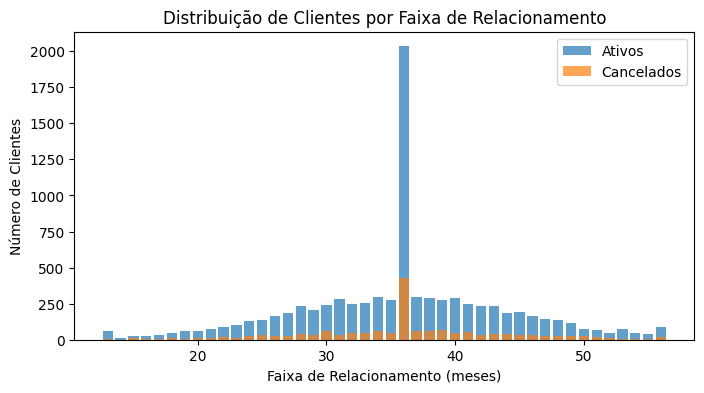

In [42]:
clientes_ativos = df[df['categoria_cliente'] == 'Cartão ativo']
clientes_cancelados = df[df['categoria_cliente'] == 'Cartão cancelado']

frequencia_ativos = clientes_ativos['relacionamento_meses'].value_counts()
frequencia_cancelados = clientes_cancelados['relacionamento_meses'].value_counts()

frequencia_ativos = frequencia_ativos.sort_index()
frequencia_cancelados = frequencia_cancelados.sort_index()

plt.figure(figsize=(8, 4))
plt.bar(frequencia_ativos.index, frequencia_ativos.values, label='Ativos', alpha=0.7)
plt.bar(frequencia_cancelados.index, frequencia_cancelados.values, label='Cancelados', alpha=0.7)
plt.xlabel('Faixa de Relacionamento (meses)')
plt.ylabel('Número de Clientes')
plt.title('Distribuição de Clientes por Faixa de Relacionamento')
plt.legend()
plt.show()


- A grande maioria dos clientes com cartão ativo e dos clientes que cancelaram o cartão está com 36 meses de relacionamento com o banco;

      Ponto crítico no ciclo de vida dos clientes;

      Investigar episódios nesse período:
       - Mudanças de contrato;
       - Campanhas de Marketing;

      Período para direcionar esforços para retenção do cliente.

#### Produtos contratados

In [44]:
# Proporção de Produtos Contratados por Categoria de Cliente
prop_produtos = df.groupby('categoria_cliente')['produtos_contratados'].mean().round(1)
print(prop_produtos)


categoria_cliente
Cartão ativo        3.9
Cartão cancelado    3.3
Name: produtos_contratados, dtype: float64


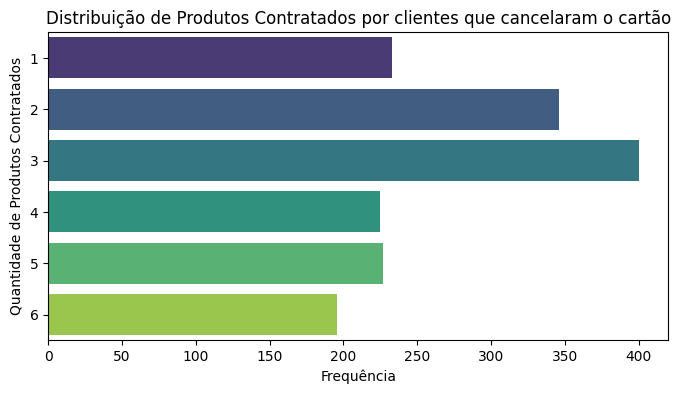

In [45]:
plt.figure(figsize=(8, 4))
sns.countplot(y='produtos_contratados', data=df_cancelado, palette='viridis')
plt.xlabel('Frequência')
plt.ylabel('Quantidade de Produtos Contratados')
plt.title('Distribuição de Produtos Contratados por clientes que cancelaram o cartão')
plt.show()

- Em relação aos produtos contratados, a maioria que cancelou o cartão está em 3 produtos, seguidos dos que compraram dois produtos.

- Poder-se-ia aqui afirmar que há uma relação entre número de produtos contratados e cancelamento do cartão. Porém, há de se observar:

      Tipo de produto;
      Satisfação com o serviço;
      Necessidade atendida através do produto;
      Segmentação dos clientes.
      

#### Inatividade anual

In [46]:
# Filtrar a inatividade, em meses, dos clientes que cancelaram o cartão
inatividade_cancelados = df_cancelado['inatividade_anual']
contagem_inatividade = inatividade_cancelados.value_counts().sort_index()
print(contagem_inatividade)
print('-----------------------------------------------------------------------')
inatividade_percent = (contagem_inatividade / contagem_inatividade.sum()) * 100
inatividade_percent = inatividade_percent.round(1)
print(inatividade_percent)

0     15
1    100
2    505
3    826
4    130
5     32
6     19
Name: inatividade_anual, dtype: int64
-----------------------------------------------------------------------
0     0.9
1     6.1
2    31.0
3    50.8
4     8.0
5     2.0
6     1.2
Name: inatividade_anual, dtype: float64


- Alta concentração de clientes (mais de 80%) que cancelaram o cartão tem 2 a 3 meses de inatividade anual;
- Possíveis tendências:

      - Mudanças na necessidade do cliente:
          * Realizar pesquisas de mercado ou de satisfação com clientes para entender as razões.
      - Sem oferta de benefícios:
          * Programas de recompensas e benefícios, personalização de ofertas.
      - Comunicação ineficaz  sobre os benefícios, taxas ou políticas do cartão:
          * E-mails informativos, canais de suporte online.

#### Contatos anuais

In [47]:
# Filtrando os contatos anuais com os clientes que cancelaram o cartão
contatos_anuais = df_cancelado['contatos_anuais']
contato_cancelados = contatos_anuais.value_counts().sort_index()
print(contato_cancelados)
print('-----------------------------------------------------------------------')
contato_percent = (contato_cancelados / contato_cancelados.sum()) * 100
print(contato_percent)

0      7
1    108
2    403
3    681
4    315
5     59
6     54
Name: contatos_anuais, dtype: int64
-----------------------------------------------------------------------
0     0.430240
1     6.637984
2    24.769514
3    41.856177
4    19.360787
5     3.626306
6     3.318992
Name: contatos_anuais, dtype: float64


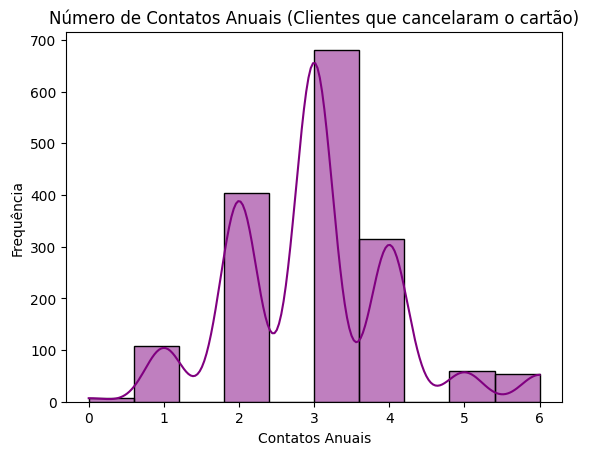

In [48]:
sns.histplot(df_cancelado['contatos_anuais'], kde=True, color='purple', bins=10)
plt.xlabel('Contatos Anuais')
plt.ylabel('Frequência')
plt.title('Número de Contatos Anuais (Clientes que cancelaram o cartão)')
plt.show()


- 40% dos clientes que cancelaram, tivem 3 contatos anuais da empresa, no período de 12 meses.

      - Trata-se de uma quantidade considerável de comunicações da empresa.
      - Avaliar se esses contatos foram efetivos em manter o engajamento ou se contribuíram para o cancelamento.

In [49]:
# Analisando os contatos realizados com clientes com 2 e 3 meses de inatividade
clientes_2_meses = df[df['inatividade_anual'] == 2]
clientes_3_meses = df[df['inatividade_anual'] == 3]

contatos_2_meses = clientes_2_meses['contatos_anuais'].value_counts().sort_index()
contatos_3_meses = clientes_3_meses['contatos_anuais'].value_counts().sort_index()

percentual_2_meses = (contatos_2_meses / contatos_2_meses.sum() * 100).round(1)
percentual_3_meses = (contatos_3_meses / contatos_3_meses.sum() * 100).round(1)

print("Contatos para clientes com 2 meses de inatividade:")
print(contatos_2_meses)
print(f'Percentual:\n{percentual_2_meses}\n')

print("\nContatos para clientes com 3 meses de inatividade:")
print(contatos_3_meses)
print(f'Percentual:\n{percentual_3_meses}')

Contatos para clientes com 2 meses de inatividade:
0     121
1     475
2    1064
3    1085
4     461
5      59
6      17
Name: contatos_anuais, dtype: int64
Percentual:
0     3.7
1    14.5
2    32.4
3    33.1
4    14.0
5     1.8
6     0.5
Name: contatos_anuais, dtype: float64


Contatos para clientes com 3 meses de inatividade:
0     154
1     534
2    1221
3    1288
4     546
5      73
6      30
Name: contatos_anuais, dtype: int64
Percentual:
0     4.0
1    13.9
2    31.7
3    33.5
4    14.2
5     1.9
6     0.8
Name: contatos_anuais, dtype: float64


- Clientes com 2 e 3 meses de inatividade, também receberam um considerável quantitativo de contatos, com a maioria recebendo 3 contatos anuais.

      - A empresa mostra-se engajada em contactar os clientes;
      - Avaliar estratégias de abordagem para reduzir as taxas de  cancelamento do cartão;
      - Reitera-se importante o feedback dos clientes sobre a eficiência dessas interações.


Corrobora-se  que o número de contatos não está relacionada diretamente, nem à inatividade dos clientes, nem ao cancelamento dos cartões.



#### Limites

In [50]:
# Criando faixas para os limites de cartão
num_bins = 10
contagem_limite_cartao = pd.cut(df_cancelado['limite_cartao'], bins=num_bins, precision=0).value_counts()
contagem_limite_cartao = contagem_limite_cartao.sort_index()
porcentagem_limite_cartao = ((contagem_limite_cartao / len(df_cancelado)) * 100).round(1)

contagem_limite_consumido = pd.cut(df_cancelado['limite_consumido'], bins=num_bins, precision=0).value_counts()
contagem_limite_consumido = contagem_limite_consumido.sort_index()
porcentagem_limite_consumido = ((contagem_limite_consumido / len(df_cancelado)) * 100).round(1)

print('FAIXAS DE LIMITE DE CARTÃO')
print(contagem_limite_cartao)
print(porcentagem_limite_cartao)
print('----------------------------------------------------------------')

print('FAIXAS DE LIMITE CONSUMIDO')
print(contagem_limite_consumido)
print(porcentagem_limite_consumido)
print('----------------------------------------------------------------')

FAIXAS DE LIMITE DE CARTÃO
(1405.0, 4746.0]      898
(4746.0, 8054.0]      228
(8054.0, 11362.0]     141
(11362.0, 14669.0]     95
(14669.0, 17977.0]     56
(17977.0, 21285.0]     34
(21285.0, 24593.0]     28
(24593.0, 27900.0]     22
(27900.0, 31208.0]     20
(31208.0, 34516.0]    105
Name: limite_cartao, dtype: int64
(1405.0, 4746.0]      55.2
(4746.0, 8054.0]      14.0
(8054.0, 11362.0]      8.7
(11362.0, 14669.0]     5.8
(14669.0, 17977.0]     3.4
(17977.0, 21285.0]     2.1
(21285.0, 24593.0]     1.7
(24593.0, 27900.0]     1.4
(27900.0, 31208.0]     1.2
(31208.0, 34516.0]     6.5
Name: limite_cartao, dtype: float64
----------------------------------------------------------------
FAIXAS DE LIMITE CONSUMIDO
(-3.0, 252.0]       924
(252.0, 503.0]       78
(503.0, 755.0]       73
(755.0, 1007.0]      88
(1007.0, 1258.0]     50
(1258.0, 1510.0]     53
(1510.0, 1762.0]     55
(1762.0, 2014.0]     54
(2014.0, 2265.0]     40
(2265.0, 2517.0]    212
Name: limite_consumido, dtype: int64
(-3.

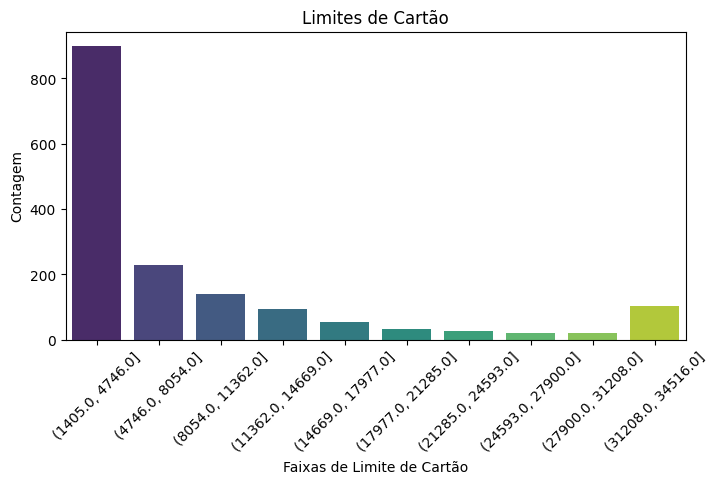

In [51]:
plt.figure(figsize=(8, 4))
sns.barplot(x=contagem_limite_cartao.index, y=contagem_limite_cartao, palette='viridis')
plt.xlabel('Faixas de Limite de Cartão')
plt.ylabel('Contagem')
plt.title('Limites de Cartão')
plt.xticks(rotation=45)
plt.show()

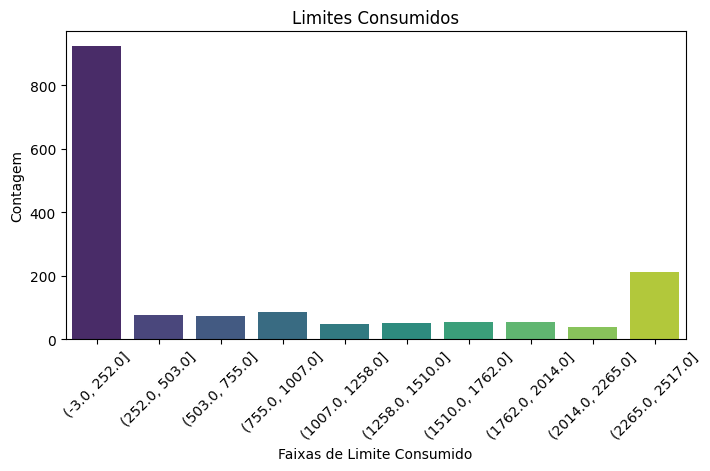

In [52]:
plt.figure(figsize=(8, 4))
sns.barplot(x=contagem_limite_consumido.index, y=contagem_limite_consumido, palette='viridis')
plt.xlabel('Faixas de Limite Consumido')
plt.ylabel('Contagem')
plt.title('Limites Consumidos')
plt.xticks(rotation=45)
plt.show()

In [53]:
# Criando um DF com as faixas de limite de cartão.

faixas_limite_cartao = [
    (1405.0, 4746.0),
    (4746.0, 8054.0),
    (8054.0, 11362.0),
    (11362.0, 14669.0),
    (14669.0, 17977.0),
    (17977.0, 21285.0),
    (21285.0, 24593.0),
    (24593.0, 27900.0),
    (27900.0, 31208.0),
    (31208.0, 34516.0)
]

ocorrencias = [898, 228, 141, 95, 56, 34, 28, 22, 20, 105]

df_faixas_limite_cartao = pd.DataFrame({
    'Faixa de Limite de Cartão': faixas_limite_cartao,
    'Ocorrências': ocorrencias
})

display(df_faixas_limite_cartao)



,Faixa de Limite de Cartão,Ocorrências
0,"(1405.0, 4746.0)",898
1,"(4746.0, 8054.0)",228
2,"(8054.0, 11362.0)",141
3,"(11362.0, 14669.0)",95
4,"(14669.0, 17977.0)",56
5,"(17977.0, 21285.0)",34
6,"(21285.0, 24593.0)",28
7,"(24593.0, 27900.0)",22
8,"(27900.0, 31208.0)",20
9,"(31208.0, 34516.0)",105


In [54]:
# Trabalhando a menor faixa de limite de cartão.
# Nessa faixa concentram-se a maioria dos clientes que cancelaram o cartão.

primeira_faixa = df_faixas_limite_cartao.iloc[0]['Faixa de Limite de Cartão']
df_primeira_faixa = df_cancelado[df_cancelado['limite_cartao'].between(primeira_faixa[0], primeira_faixa[1])]

media_valor_primeira_faixa = df_primeira_faixa['valor_transacoes_ano'].mean()
media_quantidade_primeira_faixa = df_primeira_faixa['qtde_transacoes_ano'].mean()


In [55]:
# Calculando a média das transações de todos os clientes cancelados
media_valor_cancelados = df_cancelado['valor_transacoes_ano'].mean()
media_quantidade_cancelados = df_cancelado['qtde_transacoes_ano'].mean()

In [56]:
print(f'Média dos valores de transações na primeira faixa: R${media_valor_primeira_faixa:.2f}')
print(f'Média das quantidades de transações na primeira faixa: {media_quantidade_primeira_faixa:.0f}')
print('-------------------------------------')
print(f'Média dos valores de transações de todos os clientes cancelados: R${media_valor_cancelados:.2f}')
print(f'Média das quantidades de transações de todos os clientes cancelados: {media_quantidade_cancelados:.0f}')

Média dos valores de transações na primeira faixa: R$2576.48
Média das quantidades de transações na primeira faixa: 43
-------------------------------------
Média dos valores de transações de todos os clientes cancelados: R$3095.03
Média das quantidades de transações de todos os clientes cancelados: 45


- 55.2% do total de clientes que cancelaram o cartão estão entre as faixas com os limites mais baixos.

- 56.8% do total de clientes que cancelaram o cartão estão entre as faixas com o menor consumo desse limite.

Assim como na análise da renda anual, pode-se tratar aqui, também, de USO RESPONSÁVEL.

        - Direcionar ofertas específicas, opções de aumento de limite ou produtos alternativos  mais adequados.
        - Obtenção de feedback diretamente dos clientes - melhor entendimento de suas necessidades;
        - Personalização de ofertas e serviços.

## Conclusões

Diante da análise aprofundada dos dados, torna-se evidente a necessidade de ações estratégicas para conter a crescente taxa de cancelamento de cartões.

 A taxa atual sinaliza um cenário desafiador que requer intervenções imediatas para preservar a base de clientes e mitigar possíveis prejuízos à empresa.

* Taxa de cancelamento de 16% - Sugere necessidade de ações para retenção do cliente.

* A maioria dos clientes que cancelaram o cartão são mulheres, que *pode* estar relacionada à quantidade de dependentes.

      A média da quantidade de dependentes dos clientes que cancelaram o cartão é de 2.4.

      Das mulheres que cancelaram o cartão, a maioria possui 3 dependentes.

* Mais de 93% dos clientes que cancelaram o cartão, usavam o cartão do tipo blue;

      Revisar taxas e tarifas do cartão;
      Adicionar benefícios ao tipo de cartão específicos;
      Pesquisa direta com clientes para produtos e serviços adequados às suas necessidades.
      Produtos e serviços financeiros mais adequados aos clientes de menor renda.


* Há uma possível correlação entre baixa renda anual (Menos de 40 mil) e a decisão de cancelar o cartão.

        * Alterações ou restrições financeiras;
        * Insatisfação com taxas asscoiadas ao cartão;
        * PODE-SE TRATAR TAMBÉM DO USO RESPONSÁVEL:Clientes preferem evitar uso de cartões para evitar dívidas.

* A maioria dos clientes têm um relacionamento de 36 meses com o banco.
      Ponto crítico no ciclo de vida dos clientes;
      Esforços específicos de retenção.

* Alta concentração de clientes que cancelaram o cartão com 2 a 3 meses de inatividade anual.

* 40% dos clientes que cancelaram tiveram 3 contatos anuais da empresa.

      Avaliar a eficácia do contatos em manter o engajamento e reduzir as taxas de cancelamento.

* A maioria dos clientes que cancelaram o cartão está entre as faixas com os limites mais baixos.
      Importância do uso responsável do cartão;
      Direcionar ofertas específicas, opções de aumento de limite ou produtos alternativos mais adequados.

Em suma, as análises apresentaram padrões e tendências que influenciam  no cancelamento de cartões.

Estratégias personalizadas para atender às necessidades de grupos específicos, revisão de tarifas e benefícios associados a determinados tipos de cartão, e aprimoramento da eficácia das interações com os clientes emergem como ações imperativas.

A implementação dessas recomendações pode reter os clientes e trazer mais competitividade no setor de cartões de crédito.